In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = '/content/base_datos_restaurantes_USA_v2.csv'
df = pd.read_csv(file_path)
df

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4862097674,Robert,Cortez,20.0,Masculino,Houston,Alto,-3,30.82,Sí,Sí,Vegano,Sí,NaN,garciagregory@example.net,Tarjeta,5781
29996,9458262482,Michael,Holt,78.0,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,NaN,jimmy77@example.org,Efectivo,7652
29997,3412365931,Rebecca,Henry,77.0,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,NaN,NaN,Efectivo,12639
29998,8853079811,Tamara,Griffin,77.0,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,NaN,Tarjeta,1057


In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

- id_persona: Identificador único de la persona.
- nombre: Nombre de pila de la persona.
- apellido: Apellido de la persona.
- edad: Edad de la persona en años.
- genero: Género declarado de la persona (Femenino o Masculino)
- ciudad_residencia: Ciudad donde reside actualmente la persona (elegida entre 10 ciudades principales de EE. UU.)
- estrato_socioeconomico: Nivel socioeconómico aproximado (Bajo, Medio, Alto, Muy Alto).
- frecuencia_visita: Número aproximado de visitas al mes a restaurantes.
- promedio_gasto_comida: Gasto promedio por visita a restaurantes (USD).
- ocio: Indica si la persona suele participar en actividades de ocio (Sí / No).
- consume_licor: Indica si la persona suele consumir licor (Sí / No) al visitar un restaurante.
- preferencias_alimenticias: Preferencia de dieta (Vegano, Vegetariano, Pesacado, Mariscos, etc.).
- membresia_premium: Indica si la persona tiene membresía premium (Sí / No) en algún restaurante.
- telefono_contacto: Número de teléfono (campo innecesario para el análisis, sirve para practicar limpieza).
- correo_electronico: Correo electrónico de la persona.
- tipo_de_pago_mas_usado: Método de pago más frecuente (Efectivo, Tarjeta, App, Cripto).
- ingresos_mensuales: Ingresos mensuales estimados (USD)


In [6]:
df.head(20)

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350
5,1291749568,Donna,Davis,26.0,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
6,3592027247,Jason,Mcpherson,80.0,Masculino,NYC,Muy Alto,10,56.11,No,No,Vegano,Sí,001-327-542-1940x4789,bcastillo@example.org,Efectivo,10120
7,8373803828,Julie,Russo,66.0,Femenino,Boston,Muy Alto,9,19.94,No,Sí,Vegetariano,Sí,NaN,NaN,Efectivo,13456
8,7395628831,Mark,Hall,31.0,Masculino,NYC,Medio,5,16.17,No,Sí,Vegetariano,No,NaN,kara70@example.com,App,3350
9,5394273061,Sara,Ball,37.0,Femenino,Boston,Bajo,1,11.35,Sí,No,Carnes,No,563-346-4749x6591,smithstacy@example.com,Efectivo,1197


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

In [1]:
print("Análisis descriptivo del DataFrame:")
print(df.describe(include='all'))

Análisis descriptivo del DataFrame:
          id_persona   nombre apellido          edad    genero  \
count   3.000000e+04    30000    30000  29899.000000     30000   
unique           NaN      690     1000           NaN         2   
top              NaN  Michael    Smith           NaN  Femenino   
freq             NaN      678      636           NaN     15044   
mean    5.504765e+09      NaN      NaN     49.665006       NaN   
std     2.602799e+09      NaN      NaN     23.839550       NaN   
min     1.000153e+09      NaN      NaN     -5.000000       NaN   
25%     3.243617e+09      NaN      NaN     33.000000       NaN   
50%     5.515865e+09      NaN      NaN     49.000000       NaN   
75%     7.754426e+09      NaN      NaN     65.000000       NaN   
max     9.999627e+09      NaN      NaN    300.000000       NaN   

       ciudad_residencia estrato_socioeconomico  frecuencia_visita  \
count              30000                  30000       30000.000000   
unique                10       

In [8]:
columnas_innecesarias = [
    'id_persona', 'nombre', 'apellido', 'telefono_contacto', 'correo_electronico'
]

df.drop(columns=columnas_innecesarias, inplace=True)

In [9]:
df.columns

Index(['edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico',
       'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium',
       'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       29899 non-null  float64
 1   genero                     30000 non-null  object 
 2   ciudad_residencia          30000 non-null  object 
 3   estrato_socioeconomico     30000 non-null  object 
 4   frecuencia_visita          30000 non-null  int64  
 5   promedio_gasto_comida      29855 non-null  float64
 6   ocio                       30000 non-null  object 
 7   consume_licor              30000 non-null  object 
 8   preferencias_alimenticias  28597 non-null  object 
 9   membresia_premium          30000 non-null  object 
 10  tipo_de_pago_mas_usado     30000 non-null  object 
 11  ingresos_mensuales         30000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ MB


In [11]:
# Conteo de nulos por variable
df.isnull().sum().sort_values(ascending=False)

,0
preferencias_alimenticias,1403
promedio_gasto_comida,145
edad,101
genero,0
estrato_socioeconomico,0
ciudad_residencia,0
ocio,0
frecuencia_visita,0
consume_licor,0
membresia_premium,0


Text(0, 0.5, 'Porcentaje de Valores Nulos')

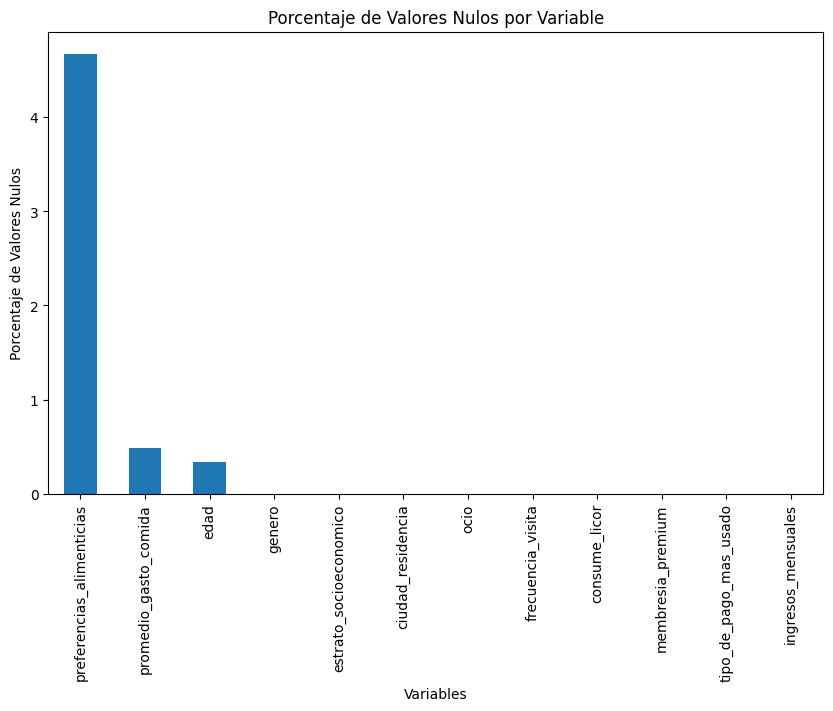

In [12]:
# Graficación del porcentaje de nulos
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de Valores Nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Nulos')

In [13]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
edad,29899.0,NaN,NaN,NaN,49.665006,23.83955,-5.0,33.0,49.0,65.0,300.0
genero,30000,2,Femenino,15044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciudad_residencia,30000,10,Chicago,5384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estrato_socioeconomico,30000,4,Medio,9325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frecuencia_visita,30000.0,NaN,NaN,NaN,3.896133,2.741532,-3.0,2.0,4.0,5.0,10.0
promedio_gasto_comida,29855.0,NaN,NaN,NaN,32.603452,26.402601,0.0,13.29,25.51,44.4,149.97
ocio,30000,2,No,15094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consume_licor,30000,2,Sí,18483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preferencias_alimenticias,28597,6,Carnes,7916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
membresia_premium,30000,2,No,17155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


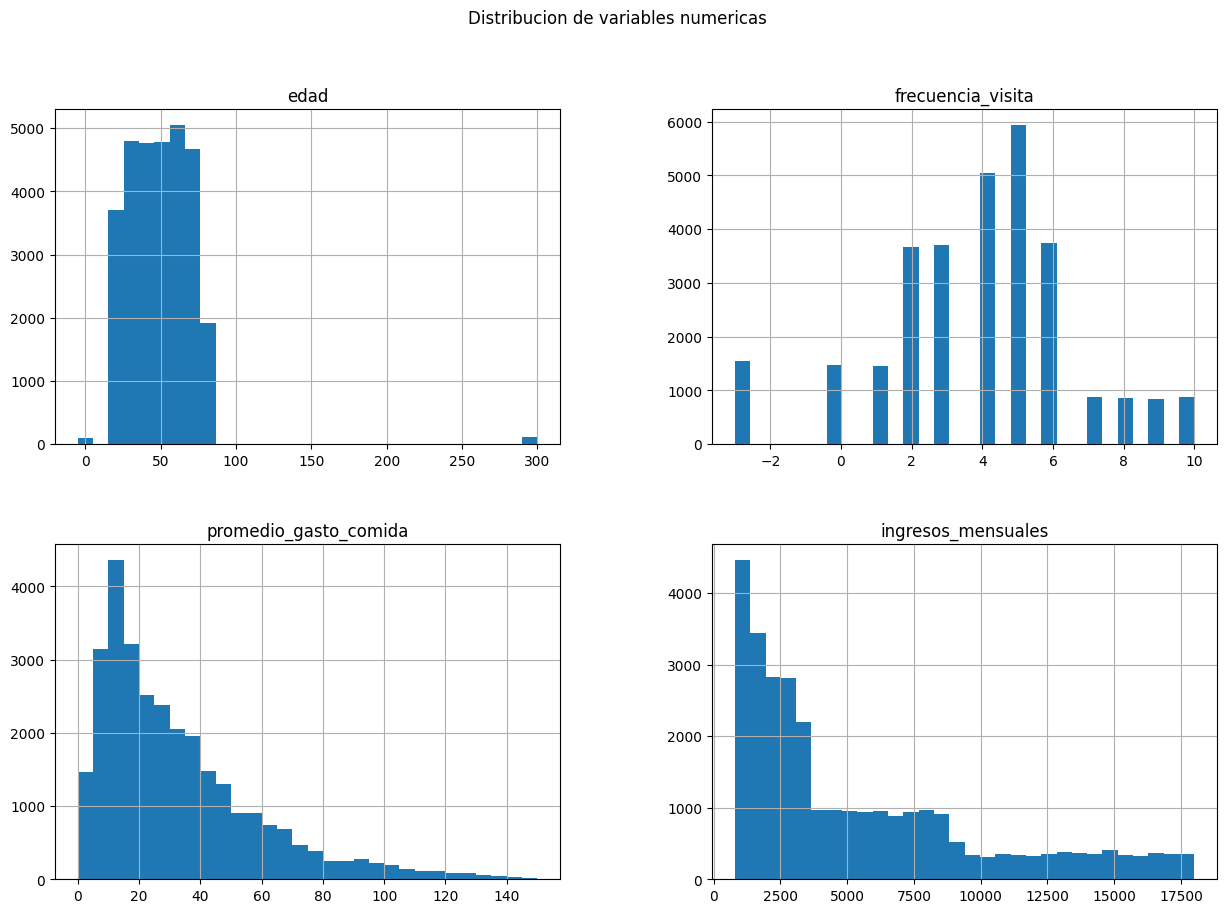

In [14]:
# Distribucion de variables numericas
df.select_dtypes(include=np.number).hist(bins=30, figsize=(15,10))
plt.suptitle('Distribucion de variables numericas')
plt.show()

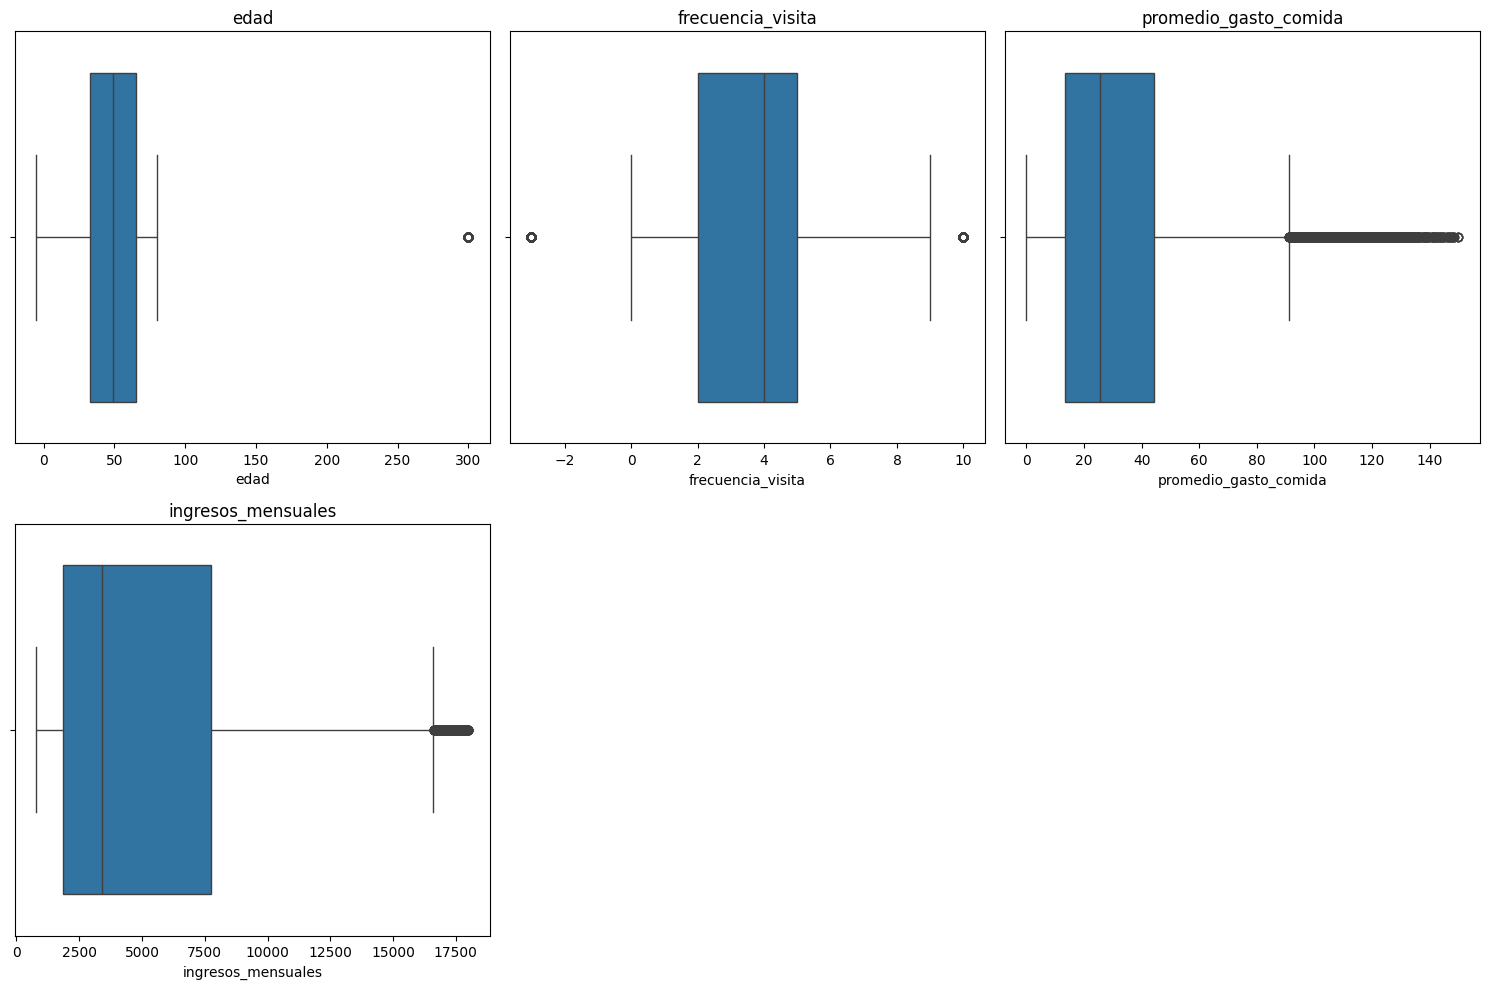

In [15]:
# Boxplot para detectar outliers o datos atipicos
num_cols = ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
# Columnas y sus respectivos valores
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(f"Columna {col}")
  print(df[col].value_counts(dropna=False))

Columna genero
genero
Femenino     15044
Masculino    14956
Name: count, dtype: int64
Columna ciudad_residencia
ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64
Columna estrato_socioeconomico
estrato_socioeconomico
Medio       9325
Alto        9038
Bajo        6161
Muy Alto    5476
Name: count, dtype: int64
Columna ocio
ocio
No    15094
Sí    14906
Name: count, dtype: int64
Columna consume_licor
consume_licor
Sí    18483
No    11517
Name: count, dtype: int64
Columna preferencias_alimenticias
preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
NaN            1403
Name: count, dtype: int64
Columna membresia_premium
membresia_premium
No    17155
Sí    12845
Name: count, dtype: int64
Columna tipo_de_pago_mas_usado
tipo_de_pag

### Eliminacion de outliers

In [18]:
# Edades negativas o absurdas
df['edad'] = df['edad'].apply(lambda x: x if (x is not None and 18 <= x <= 80) else np.nan)

# Frecuencia de visitas absurdas
df['frecuencia_visita'] = df['frecuencia_visita'].apply(lambda x: x if (x is not None and 0 <= x <= 15) else np.nan)

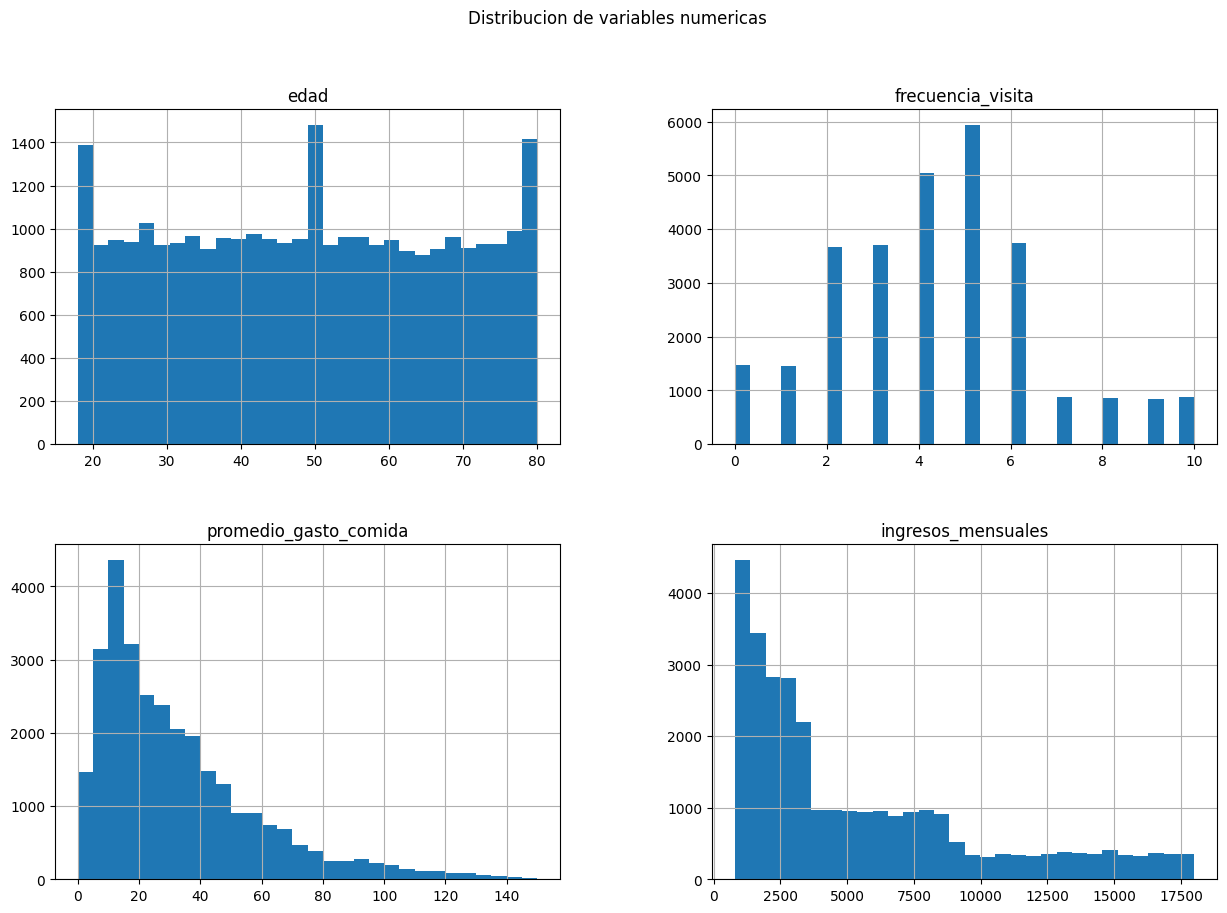

In [20]:
# Distribucion de variables numericas
df.select_dtypes(include=np.number).hist(bins=30, figsize=(15,10))
plt.suptitle('Distribucion de variables numericas')
plt.show()

### Imputacion de datos nulos

In [25]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

columnas_numericas = ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']

df_numerico = df[columnas_numericas]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

imputer = KNNImputer(n_neighbors=5)
df_imputedo_scaled = imputer.fit_transform(df_scaled)

df_imputado = scaler.inverse_transform(df_imputedo_scaled)
df[columnas_numericas] = pd.DataFrame(df_imputado, columns=columnas_numericas)

In [27]:
df['preferencias_alimenticias'].value_counts(dropna=False)

,count
preferencias_alimenticias,
Carnes,7916
Vegetariano,6580
Mariscos,5212
Vegano,3267
Pescado,2983
Otro,2639
NaN,1403


In [28]:
df['preferencias_alimenticias'] = df['preferencias_alimenticias'].fillna('Otro')

In [29]:
df = df.astype({
    'edad': 'int',
    'frecuencia_visita': 'int',
    'promedio_gasto_comida': 'float',
    'ingresos_mensuales': 'float'
})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       30000 non-null  int64  
 1   genero                     30000 non-null  object 
 2   ciudad_residencia          30000 non-null  object 
 3   estrato_socioeconomico     30000 non-null  object 
 4   frecuencia_visita          30000 non-null  int64  
 5   promedio_gasto_comida      30000 non-null  float64
 6   ocio                       30000 non-null  object 
 7   consume_licor              30000 non-null  object 
 8   preferencias_alimenticias  30000 non-null  object 
 9   membresia_premium          30000 non-null  object 
 10  tipo_de_pago_mas_usado     30000 non-null  object 
 11  ingresos_mensuales         30000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ MB


### Analisis multivariable

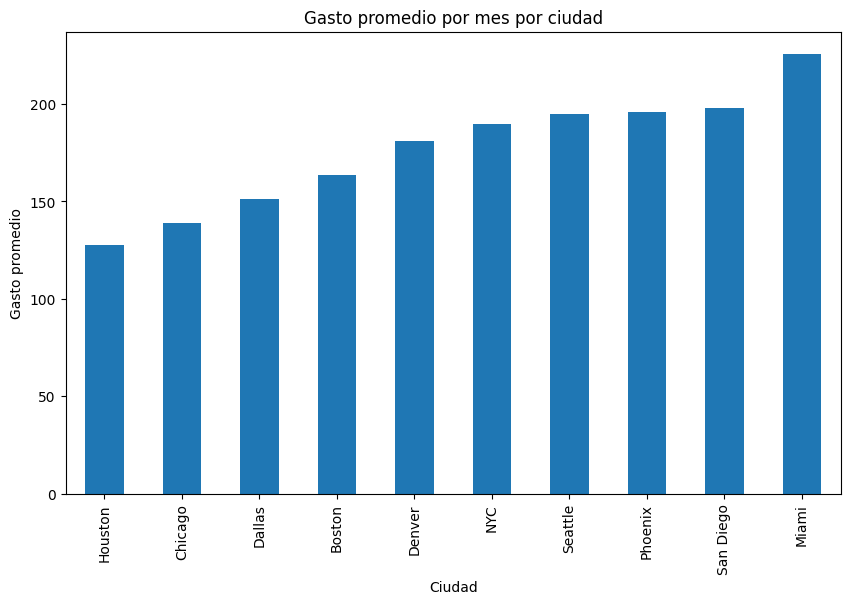

In [32]:
df['promedio_gasto_total_mes'] = df['frecuencia_visita'] * df['promedio_gasto_comida']
city_gasto = df.groupby('ciudad_residencia')['promedio_gasto_total_mes'].mean().sort_values()

city_gasto.plot(kind='bar', figsize=(10, 6))
plt.title('Gasto promedio por mes por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Gasto promedio')
plt.show()

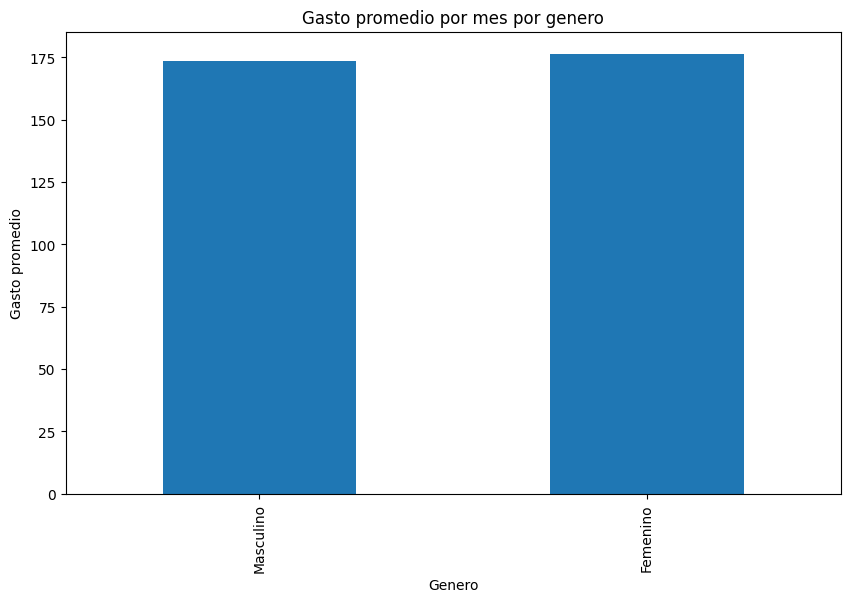

In [34]:
# Gasto promedio genero al mes
genero_gasto = df.groupby('genero')['promedio_gasto_total_mes'].mean().sort_values()
genero_gasto.plot(kind='bar', figsize=(10, 6))
plt.title('Gasto promedio por mes por genero')
plt.xlabel('Genero')
plt.ylabel('Gasto promedio')
plt.show()

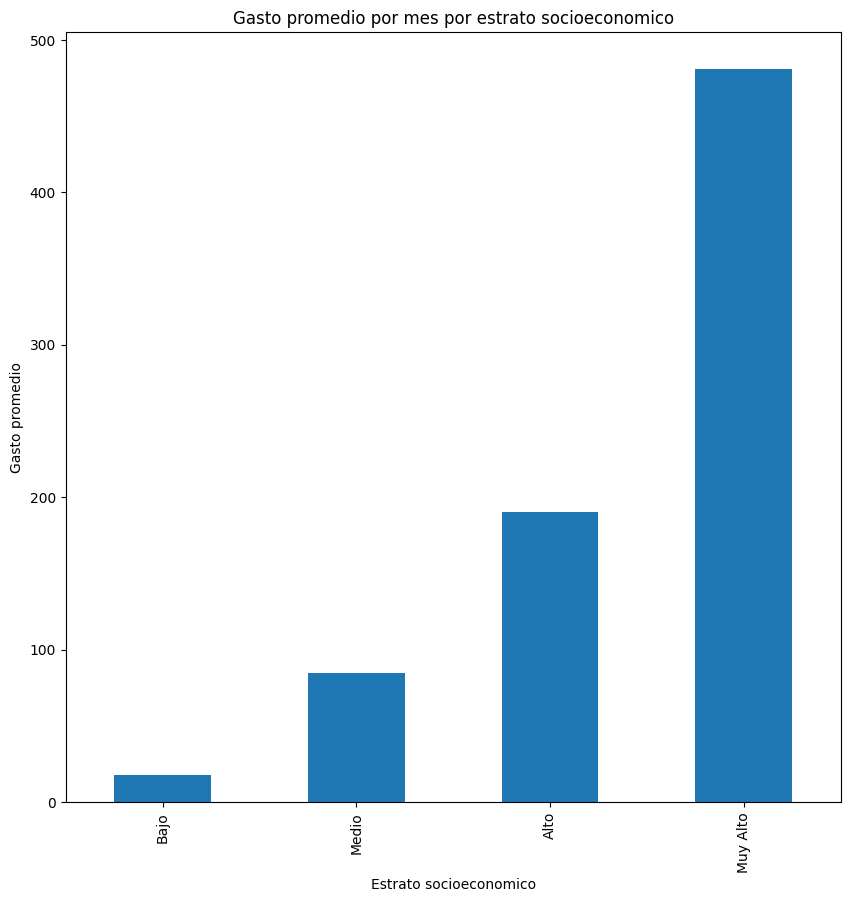

In [37]:
# Gasto promedio por estrato socioeconomico al mes
estrato_gasto = df.groupby('estrato_socioeconomico')['promedio_gasto_total_mes'].mean().sort_values()
estrato_gasto.plot(kind='bar', figsize=(10,10))
plt.title('Gasto promedio por mes por estrato socioeconomico')
plt.xlabel('Estrato socioeconomico')
plt.ylabel('Gasto promedio')
plt.show()

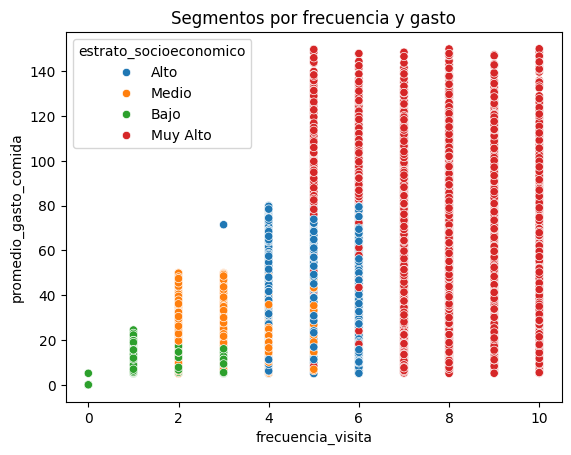

In [39]:
# Segmentos por frecuencia y gasto
sns.scatterplot(data=df, x='frecuencia_visita', y='promedio_gasto_comida', hue='estrato_socioeconomico')
plt.title('Segmentos por frecuencia y gasto')
plt.show()

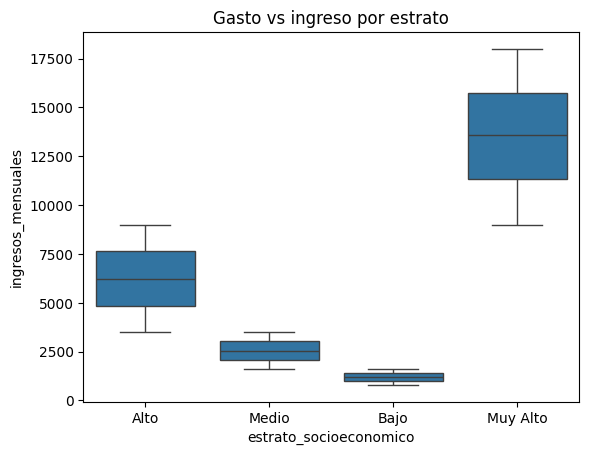

In [40]:
# Gasto vs ingreso por estrato
sns.boxplot(data=df, x='estrato_socioeconomico', y='ingresos_mensuales')
plt.title('Gasto vs ingreso por estrato')
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'staked'

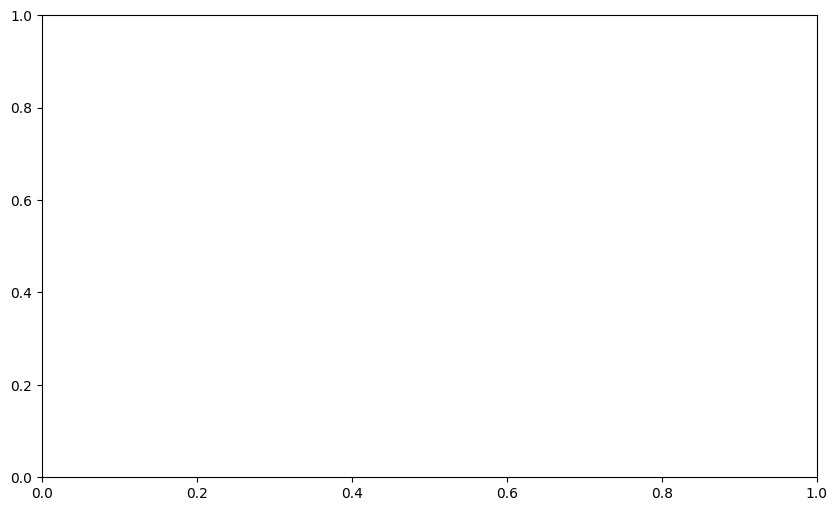

In [44]:
#Preferencias alimenticias por ciudad
pref_ciudad = pd.crosstab(df['ciudad_residencia'], df['preferencias_alimenticias'], normalize='index')
pref_ciudad.plot(kind='bar', staked=True,figsize=(10, 6))
plt.title('Preferencias alimenticias por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.show()

In [45]:
# Perfil del cliente de alto gasto
threshhold = df['promedio_gasto_total_mes'].quantile(0.9)
high_gasto = df[df['promedio_gasto_total_mes'] >= threshhold]
high_gasto.describe(include='all')

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,tipo_de_pago_mas_usado,ingresos_mensuales,promedio_gasto_total_mes
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,NaN,2,10,2,NaN,NaN,2,2,6,2,4,NaN,NaN
top,NaN,Femenino,NYC,Muy Alto,NaN,NaN,Sí,Sí,Carnes,Sí,Efectivo,NaN,NaN
freq,NaN,1562,516,2881,NaN,NaN,1526,1889,757,2840,1198,NaN,NaN
mean,48.463333,NaN,NaN,NaN,7.811000,89.576912,NaN,NaN,NaN,NaN,NaN,13227.862667,690.151461
std,18.232502,NaN,NaN,NaN,1.610428,22.966007,NaN,NaN,NaN,NaN,NaN,2879.393934,209.997511
min,18.000000,NaN,NaN,NaN,5.000000,42.440000,NaN,NaN,NaN,NaN,NaN,3503.000000,422.450000
25%,33.000000,NaN,NaN,NaN,6.000000,72.087500,NaN,NaN,NaN,NaN,NaN,11007.750000,521.197500
50%,48.000000,NaN,NaN,NaN,8.000000,88.310000,NaN,NaN,NaN,NaN,NaN,13387.500000,642.640000
75%,64.000000,NaN,NaN,NaN,9.000000,104.067500,NaN,NaN,NaN,NaN,NaN,15530.500000,814.837500


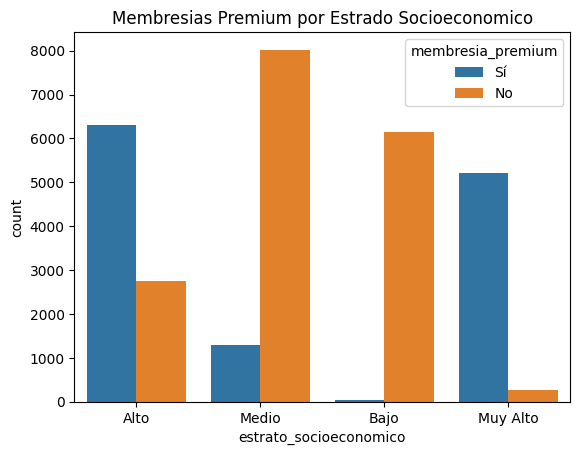

In [46]:
# Distribucion de membresia por estrato
sns.countplot(data=df, x='estrato_socioeconomico', hue='membresia_premium')
plt.title('Membresias Premium por Estrado Socioeconomico')
plt.show()

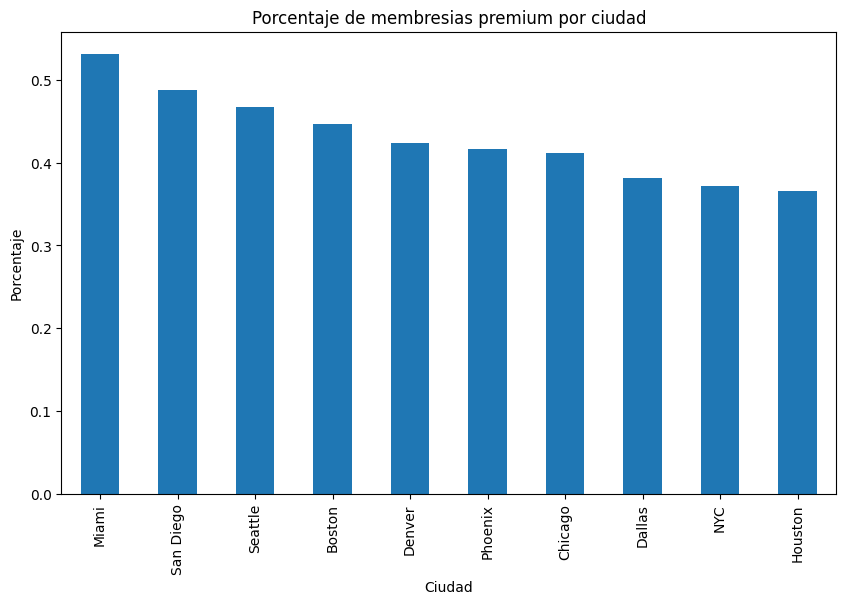

In [50]:
# Porcentaje de membresias por ciudad
membresia_ciudad = df.groupby('ciudad_residencia')['membresia_premium'].value_counts(normalize=True).unstack()
membresia_ciudad['Sí'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de membresias premium por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.show()

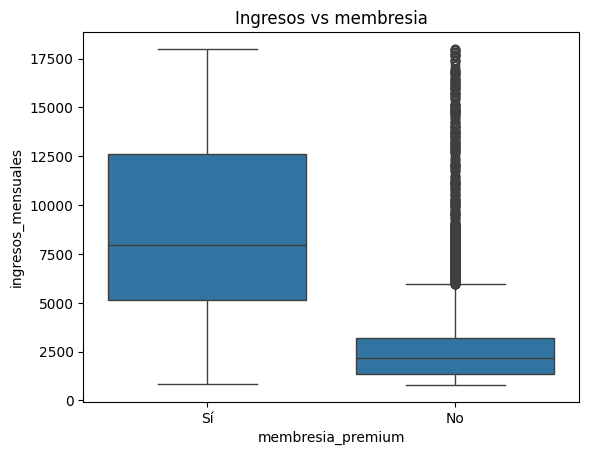

In [51]:
# Boxplot ingresos vs membresia
sns.boxplot(data=df, x='membresia_premium', y='ingresos_mensuales')
plt.title('Ingresos vs membresia')
plt.show()

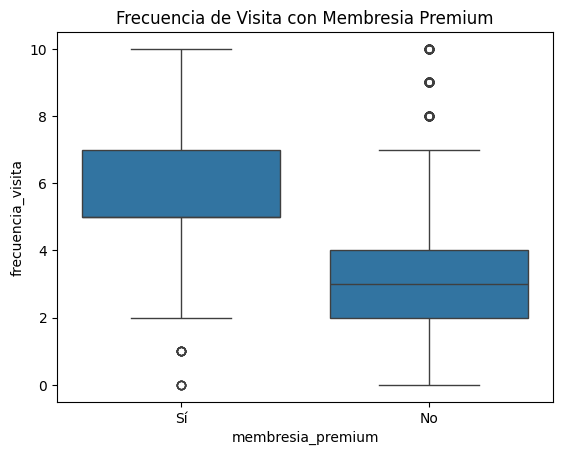

In [52]:
# Boxplot de frecuencia de visita con respecto a si tienen membresia premium en algun restaurante
sns.boxplot(data=df, x='membresia_premium', y='frecuencia_visita')
plt.title('Frecuencia de Visita con Membresia Premium')
plt.show()

In [53]:
# Crosstab preferencias alimenticias
pd.crosstab(df['preferencias_alimenticias'], df['membresia_premium'], normalize='index') * 100


membresia_premium,No,Sí
preferencias_alimenticias,,
Carnes,59.183931,40.816069
Mariscos,55.890253,44.109747
Otro,57.644730,42.355270
Pescado,57.626550,42.373450
Vegano,57.055403,42.944597
Vegetariano,55.379939,44.620061


/tmp/ipython-input-2803838621.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_por_edad = df.groupby('grupo_edad')['consume_licor'].value_counts(normalize=True).unstack()


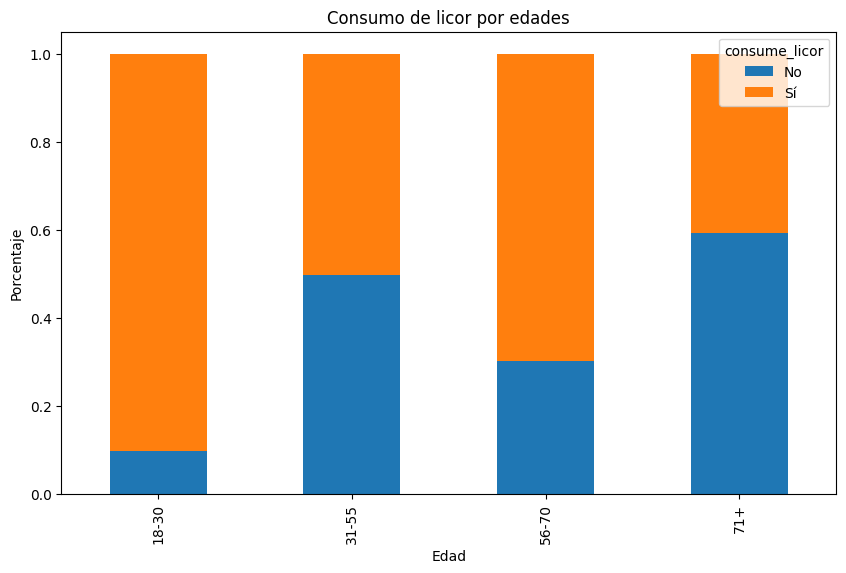

In [55]:
# Consumo de licor por edades
df['grupo_edad'] = pd.cut(df['edad'], bins=[17, 30, 55, 70, 100], labels=['18-30', '31-55', '56-70', '71+'])
alcohol_por_edad = df.groupby('grupo_edad')['consume_licor'].value_counts(normalize=True).unstack()
alcohol_por_edad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Consumo de licor por edades')
plt.xlabel('Edad')
plt.ylabel('Porcentaje')
plt.show()